# SVM Lab


In this lab/lecture, we will learn about the Support Vector Machine classifier

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from seaborn import plt

/Users/keith/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from sklearn import svm

## Linear SVMs: some intuitions
To develop our intuitions, let us look at a very simple classification problem: classifying irises based on sepal length and width. We only use 2 features to enable easy visualization.


In [3]:
svc = svm.SVC(kernel='linear')
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

To visualize the prediction, we evaluate it on a grid of points:

In [4]:
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

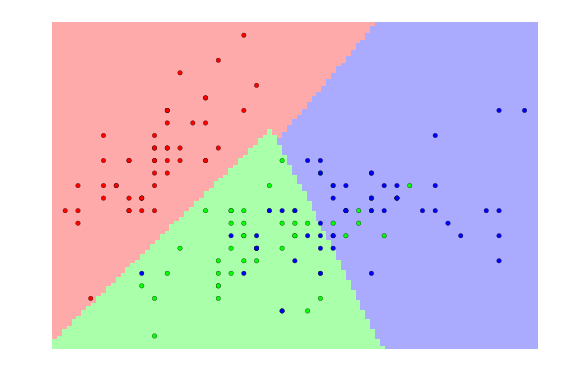

In [5]:
plot_estimator(svc, X, y)

As we can see, kernel="linear" gives linear decision frontiers: the frontier between two classes is a line.

How does multi-class work? With the SVC object, it is done by combining "one versus one" decisions on each pair of classes.

LinearSVC: for linear kernels, there is another object, the LinearSVC that uses a different algorithm. On some data it may be faster (for instance sparse data, as in text mining). It uses a "one versus all" strategy for multi-class problems.

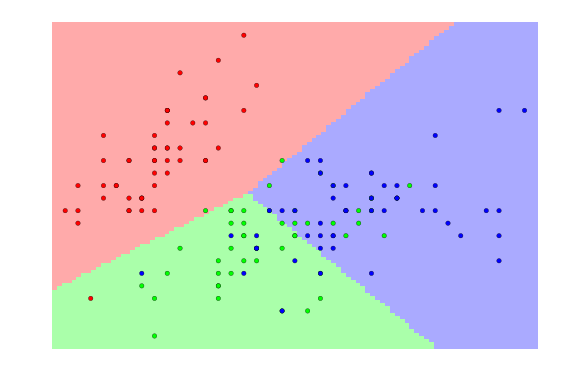

In [6]:
plot_estimator(svm.LinearSVC(), X, y)

Note: SVRs (Support Vector Regression) work like SVCs, but for regression rather than classification.



## Support vectors and Regularization
Support vectors: The way a support vector machine works is by finding a decision boundary separating the 2 classes that is spanned by a small number of training samples, called "support vectors". These samples lie closest to the other class, and can thus be considered as most representative samples in terms of the two-class discrimination problem.

To make visualization even simpler, let us consider a 2 class problem, for instance using classes 1 and 2 in the iris dataset. These 2 classes are not well linearly separable, which makes it an interesting problem.

The indices of the support vectors for each class can be found in the support_vectors_ attribute. We highlight them in the following figure.

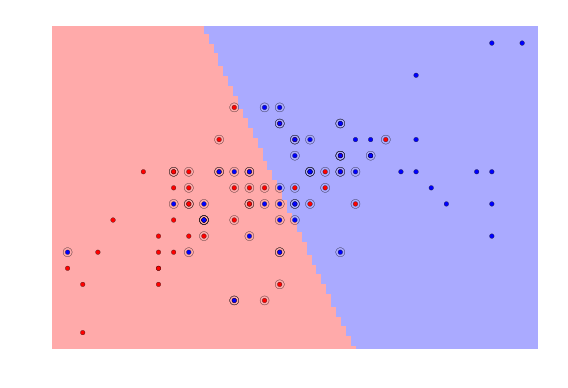

In [7]:
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)


Regularization: Considering only the discriminant samples is a form of regularization. Indeed, it forces the model to be simpler in how it combines observed structures.

This regularization can be tuned with the C parameter:

-Low C values: many support vectors... Decision frontier = mean(class A) - mean(class B)

-High C values: small number of support vectors: Decision frontier fully driven by most disriminant samples

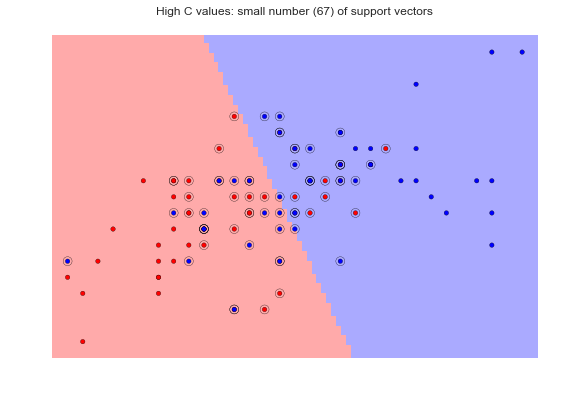

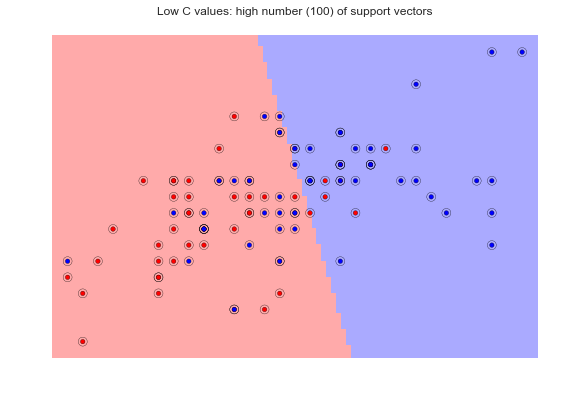

In [8]:
svc_hiC = svm.SVC(kernel='linear', C=1e3)  # C = 1,000
plot_estimator(svc_hiC, X, y)
plt.scatter(svc_hiC.support_vectors_[:, 0], svc_hiC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('High C values: small number ({:,}) of support vectors'.format(len(svc_hiC.support_vectors_)))

svc_loC = svm.SVC(kernel='linear', C=1e-3)  # C = 0.001
plot_estimator(svc_loC, X, y)
plt.scatter(svc_loC.support_vectors_[:, 0], svc_loC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Low C values: high number ({:,}) of support vectors'.format(len(svc_loC.support_vectors_)))

One nice features of SVMs is that on many datasets, the default value 'C=1' works well.

Practical note: Normalizing data For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is often important to get good prediction.

## Exercise: Tune an SVM on the digits dataset¶

### the digits dataset [link](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

In [9]:
# Import sklearn.datasets
from sklearn import datasets
# Import numpy
import numpy as np
# Load the digits dataset (already in sklearn) by calling datasets.load_digits()
digits = datasets.load_digits()
# Generate X and y by retrieving digits.data and digits.target
X, y = digits.data, digits.target
# Print out the shape of X and make sure it is 1797 x 64
print X.shape

(1797, 64)


Install [scikit-image](http://scikit-image.org/) by calling `conda install scikit-image` at the command line.

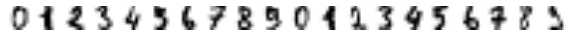

In [10]:
#Let's First visualize the contents of the dataset
# Import skimage.io as io
import skimage.io as io

# Generate a figure by calling plt.figure() with figsize=(10, 7)
fig = plt.figure(figsize=(10, 7))
# plot several images
for i in range(20):
    ax = fig.add_subplot(1, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X[i,:], (8, 8), 'A'))
    

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#Split the training set into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Train an SVM (you can use whichever type you like)
svc = svm.SVC(kernel='linear', C=1e3)
svc.fit(X_train, y_train)
#Predict, and get y_predictions
y_predictions = svc.predict(X_test)

In [12]:
#use sklearn.metrics.accuracy_score to get the accuracy results
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_predictions)

0.984444444444


In [13]:
from sklearn import cross_validation

#Now let's make sure our results were not a fluke, and let's use  cross validation  
#to see how robust our results are, do it (cross_val_score) with 10-fold cross-validation
scores = cross_validation.cross_val_score(svc, X, y, cv=10)
print scores
print scores.mean()

[ 0.93513514  0.99453552  0.9281768   0.96111111  0.96089385  0.98882682
  0.96648045  0.97752809  0.93220339  0.96590909]
0.96108002489


## Kernels

One appealling aspect of SVMs is that they can easily be used to build non linear decision frontiers using kernels. Kernel define the 'building blocks' that are assembled to form a decision rule.

linear - will give linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.

poly - will give decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

rbf - uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs, that ultimately controls the smoothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.

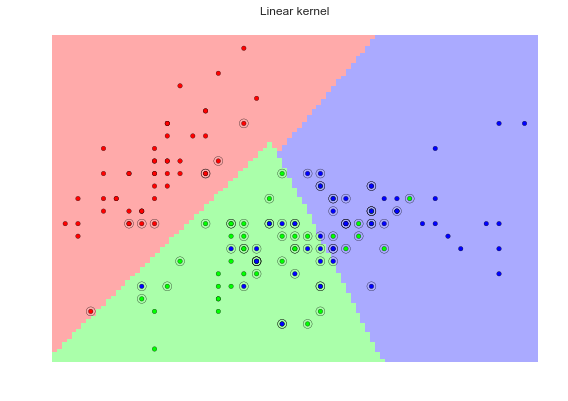

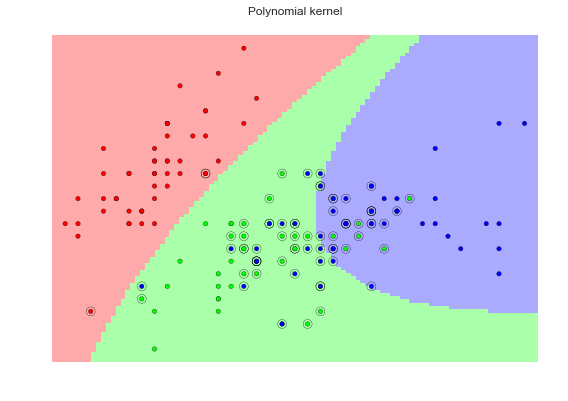

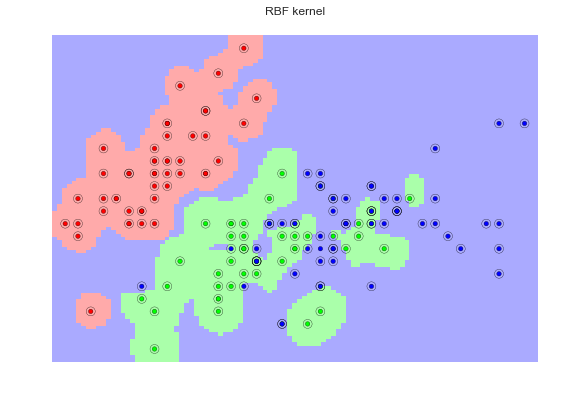

In [14]:
#reload the iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Linear kernel')

svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Polynomial kernel')

svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('RBF kernel')

### GridSearch Cross-Validation
Most of the ML methods we've been using have 1 or more model ***hyperparameters*** that need to be optimized by cross-validation.  For instance, for a **soft margin SVM classifier** with an **RBF kernel** we will have the hyperparameters ***C*** and ***gamma***.  We need to try several different pairings of these hyperparameters and choose the model that performs best in cross-validation. 

`sklearn` provides the ability to do this easily with [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).  Here's how we might use it to optimize such a classifier:

In [16]:
# grid search for optimal parameters
from sklearn.grid_search import GridSearchCV
C_range = 10.0 ** np.arange(-2, 5)
gamma_range = 10.0 ** np.arange(-4, 5)
param_grid = dict(C=C_range, gamma=gamma_range)
print param_grid
grid = GridSearchCV(svc, param_grid, scoring='accuracy')
grid.fit(X, y)
# print grid.grid_scores_
# print grid.best_score_
# print grid.best_estimator_
# print grid.best_params_
# plot_estimator(grid.best_estimator_, X, y)

{'C': array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04]), 'gamma': array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03,   1.00000000e+04])}


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=100.0, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

## Exercise: repeat the digits dataset classification using different kernels
Try out different things that we did above, try a grid search for the optimal model hyperparameters.

In [2]:
# Let's try a grid search over baically any parameters!
from sklearn.grid_search import GridSearchCV
# Instatiatie the model object, a Support Vector Classifier
svc = svm.SVC()
# Range of possible values for C (valid for all kernels), gamma (rbf kernel), degree (polynomial kernel)
C_range = 10.0 ** np.arange(-2, 5)
gamma_range = 10.0 ** np.arange(-4, 5)
degree_range=[2,3,4]
# Different kernels to try
kernels=['linear', 'poly', 'rbf']
param_grid = dict(C=C_range, gamma=gamma_range, degree=degree_range, kernel=kernels)
grid = GridSearchCV(svc, param_grid, scoring='accuracy')
grid.fit(X, y)

# If this doesn't finish in any reasonable time for you, remember that we have to build size(C*gamma*degree*kernels) 
# different models here!  That's 7*9*3*3=567 models!  Maybe think about some optimization...

NameError: name 'svm' is not defined

## Further Exercise: Random dataset
Achieve better than 98% training accuracy with a support vector machine (sklearn's SVC will do nicely) on the data in [svm_data.csv](https://github.com/pburkard88/DS_BOS_07/blob/master/Data/svm_data.csv). Recommendation: First load the data and get something working. You'll probably use some combination of pandas DataFrames and numpy ndarrays. Things that might be helpful: values and shape. Consider the parameters to SVC. You might also visualize things with matplotlib's scatter, for instance. Since we only have 2 features here, you can really play around with visualizing the different results in 2D.  

Think about scaling as well. Remember you have access to functions like mean (etc.) on DataFrames. Optionally, compare to other sklearn algorithms such as logistic regression.  Try out a GridSearch for the optimal hyperparameters.

In [8]:
import pandas as pd
import numpy as np
from sklearn import svm

In [4]:
# Read in the data
df = pd.read_csv('../Data/svm_data.csv')
df.head()

,feature_1,feature_2,label
0,-0.100368,18.513293,True
1,0.360571,54.190095,False
2,0.185595,87.294584,False
3,0.078927,73.222489,True
4,-0.275185,80.656115,False


In [5]:
# Check out the values, none are null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
feature_1    1000 non-null float64
feature_2    1000 non-null float64
label        1000 non-null bool
dtypes: bool(1), float64(2)
memory usage: 24.4 KB


In [14]:
# We only have 2 features, so we can visualize them a lot
%matplotlib inline
import numpy as np
import pandas as pd
from seaborn import plt

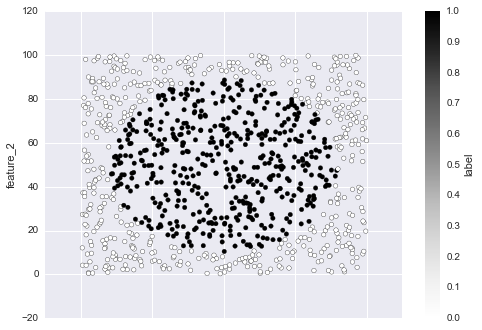

In [17]:
# Let's try a scatter point colored by the class
df.plot.scatter('feature_1', 'feature_2', c='label')

In [50]:
# It's always a good idea to scale our features first, let's try a basic standardization!
from sklearn.preprocessing import scale
X = scale(df[['feature_1', 'feature_2']])
y = df['label']

In [62]:
# Here I started with some smaller versions of C and Larger versions of gamma, kept getting better as I increased C
# and decreased gamma, until I eventually got to .997
svc = svm.SVC(kernel='rbf')
C_vals = [1e6]
gammas = [1e-2]
params = {'C':C_vals, 'gamma':gammas}
grid = GridSearchCV(svc, params, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1000000.0], 'gamma': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [60]:
grid.best_score_

0.997

In [61]:
grid.best_estimator_

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.01, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [63]:
# Let's just try on an arbitrary test set
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y)
grid.best_estimator_.score(X_train, y_train)

1.0